In [2]:
import pandas as pd

# Load the dataset
file_path = 'tourism_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check for missing values and clean the dataset
print("\nMissing Values Summary:")
print(data.isnull().sum())

# Fill or drop missing values (modify as needed based on your dataset)
data_cleaned = data.dropna()

# Display the cleaned dataset
print("\nCleaned Dataset Preview:")
print(data_cleaned.head())

# Save the cleaned dataset for further steps
data_cleaned.to_csv('cleaned_tourism_dataset.csv', index=False)


Dataset Preview:
     Location Country    Category  Visitors  Rating    Revenue Unnamed: 6
0  kuBZRkVsAR   India      Nature    948853    1.32   84388.38        Yes
1  aHKUXhjzTo     USA  Historical    813627    2.01  802625.60         No
2  dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11        Yes
3  DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60        Yes
4  WJCCQlepnz  France    Cultural    124867    1.43  547893.24         No

Missing Values Summary:
Location      0
Country       0
Category      0
Visitors      0
Rating        0
Revenue       0
Unnamed: 6    0
dtype: int64

Cleaned Dataset Preview:
     Location Country    Category  Visitors  Rating    Revenue Unnamed: 6
0  kuBZRkVsAR   India      Nature    948853    1.32   84388.38        Yes
1  aHKUXhjzTo     USA  Historical    813627    2.01  802625.60         No
2  dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11        Yes
3  DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60     

In [3]:
from mlxtend.preprocessing import TransactionEncoder

# Convert the dataset into a list of transactions
transactions = data_cleaned.values.tolist()

# Apply TransactionEncoder to convert to one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display the one-hot encoded dataset
print("One-Hot Encoded Dataset Preview:")
print(df_encoded.head())

# Save the preprocessed dataset
df_encoded.to_csv('encoded_tourism_dataset.csv', index=False)


TypeError: '<' not supported between instances of 'str' and 'float'

In [4]:
from mlxtend.preprocessing import TransactionEncoder

# Convert the dataset into a list of transactions
# Ensure all elements are strings to avoid type errors
transactions = data_cleaned.astype(str).values.tolist()

# Apply TransactionEncoder to convert to one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display the one-hot encoded dataset
print("One-Hot Encoded Dataset Preview:")
print(df_encoded.head())

# Save the preprocessed dataset
df_encoded.to_csv('encoded_tourism_dataset.csv', index=False)


One-Hot Encoded Dataset Preview:
     1.0   1.01   1.02   1.03   1.04   1.05   1.06   1.07   1.08   1.09  ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   
1  False  False  False  False  False  False  False  False  False  False  ...   
2  False  False  False  False  False  False  False  False  False  False  ...   
3  False  False  False  False  False  False  False  False  False   True  ...   
4  False  False  False  False  False  False  False  False  False  False  ...   

   zuuwhksGzK  zuyynLEliF  zvYdwkMfjU  zvnaQZyFgX  zwOvgqdBjb  zxhANDPGeq  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   zyhDStFDgG  zynsSGzN

In [5]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import time

# Measure the execution time
start_time = time.time()

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Measure the end time
execution_time = time.time() - start_time

# Display the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Save the frequent itemsets to a CSV file
frequent_itemsets.to_csv('frequent_itemsets.csv', index=False)
# Print the execution time
print(f"\nExecution Time: {execution_time:.2f} seconds")


Frequent Itemsets:
     support           itemsets
0   0.173151        (Adventure)
1   0.138587        (Australia)
2   0.166639            (Beach)
3   0.140257           (Brazil)
4   0.134580            (China)
5   0.166639         (Cultural)
6   0.152279            (Egypt)
7   0.143096           (France)
8   0.165971       (Historical)
9   0.149608            (India)
10  0.159626           (Nature)
11  0.496911               (No)
12  0.141593              (USA)
13  0.167975            (Urban)
14  0.503089              (Yes)
15  0.089497    (Adventure, No)
16  0.083653   (Adventure, Yes)
17  0.070963    (Australia, No)
18  0.067624   (Australia, Yes)
19  0.079646        (Beach, No)
20  0.086993       (Beach, Yes)
21  0.067123       (Brazil, No)
22  0.073134      (Brazil, Yes)
23  0.068960        (No, China)
24  0.065620       (Yes, China)
25  0.084655     (Cultural, No)
26  0.081984    (Cultural, Yes)
27  0.076307        (Egypt, No)
28  0.075973       (Egypt, Yes)
29  0.071965       (F

In [8]:
import memory_profiler
import matplotlib.pyplot as plt

# Measure memory usage
memory_usage = memory_profiler.memory_usage((apriori, (df_encoded, ), {'min_support': 0.05, 'use_colnames': True}))
max_memory_usage = max(memory_usage)

# Scalability: Measure execution time for smaller subsets
scalability_results = []
dataset_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]  # Fractions of the dataset
for size in dataset_sizes:
    subset = df_encoded.sample(frac=size, random_state=42)
    start_time = time.time()
    apriori(subset, min_support=0.05, use_colnames=True)
    scalability_results.append(time.time() - start_time)

# Output Quality: Number of frequent itemsets
output_quality = len(frequent_itemsets)

# Print metrics
print(f"Execution Time: {execution_time:.2f} seconds")
print(f"Maximum Memory Usage: {max_memory_usage:.2f} MiB")
print(f"Output Quality (Number of Frequent Itemsets): {output_quality}")
print(f"Scalability Results (Execution Time for Subsets): {scalability_results}")

# Save metrics for visualization
metrics = {
    'Metric': ['Execution Time', 'Memory Usage', 'Output Quality'],
    'Value': [execution_time, max_memory_usage, output_quality]
}


Execution Time: 0.38 seconds
Maximum Memory Usage: 254.59 MiB
Output Quality (Number of Frequent Itemsets): 41
Scalability Results (Execution Time for Subsets): [0.09775114059448242, 0.14816522598266602, 0.16750192642211914, 0.23342370986938477, 0.27741003036499023]


In [7]:
!pip install memory-profiler


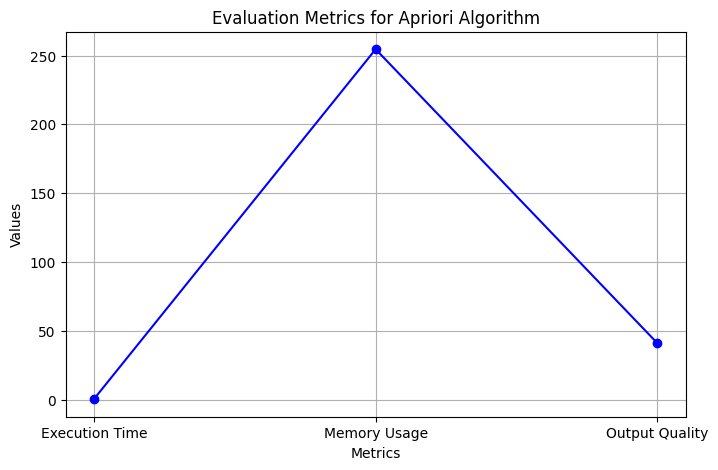

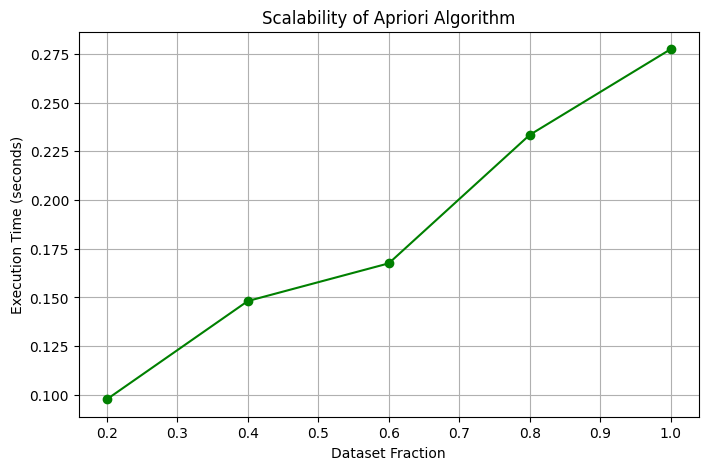

In [9]:
import matplotlib.pyplot as plt

# Plot the primary metrics
metrics = ['Execution Time', 'Memory Usage', 'Output Quality']
values = [execution_time, max_memory_usage, output_quality]

plt.figure(figsize=(8, 5))
plt.plot(metrics, values, marker='o', linestyle='-', color='b')
plt.title('Evaluation Metrics for Apriori Algorithm')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Plot scalability results
plt.figure(figsize=(8, 5))
plt.plot(dataset_sizes, scalability_results, marker='o', linestyle='-', color='g')
plt.title('Scalability of Apriori Algorithm')
plt.xlabel('Dataset Fraction')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()


In [10]:
import numpy as np
from memory_profiler import memory_usage

# Initialize lists to store metrics
execution_times = []
memory_usages = []
variances = []
mean_support_values = []

# Dataset fractions for scalability analysis
dataset_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]

# Evaluate metrics for each dataset fraction
for size in dataset_sizes:
    subset = df_encoded.sample(frac=size, random_state=42)
    
    # Measure execution time
    start_time = time.time()
    frequent_itemsets = apriori(subset, min_support=0.05, use_colnames=True)
    execution_time = time.time() - start_time
    execution_times.append(execution_time)
    
    # Measure memory usage
    memory_usage_value = max(memory_usage((apriori, (subset,), {'min_support': 0.05, 'use_colnames': True})))
    memory_usages.append(memory_usage_value)
    
    # Calculate variance in frequent itemset sizes
    itemset_lengths = frequent_itemsets['itemsets'].apply(len)
    variances.append(np.var(itemset_lengths))
    
    # Calculate mean support value
    mean_support = frequent_itemsets['support'].mean()
    mean_support_values.append(mean_support)

# Print the results
print("Execution Times:", execution_times)
print("Memory Usages:", memory_usages)
print("Variances:", variances)
print("Mean Support Values:", mean_support_values)


Execution Times: [0.0989077091217041, 0.14003944396972656, 0.22579479217529297, 0.2943103313446045, 0.30231332778930664]
Memory Usages: [282.43359375, 303.4765625, 324.5234375, 345.41015625, 366.40625]
Variances: [0.232004759071981, 0.232004759071981, 0.232004759071981, 0.232004759071981, 0.232004759071981]
Mean Support Values: [0.12195121951219512, 0.12195121951219512, 0.12195121951219512, 0.12195121951219512, 0.12195121951219512]


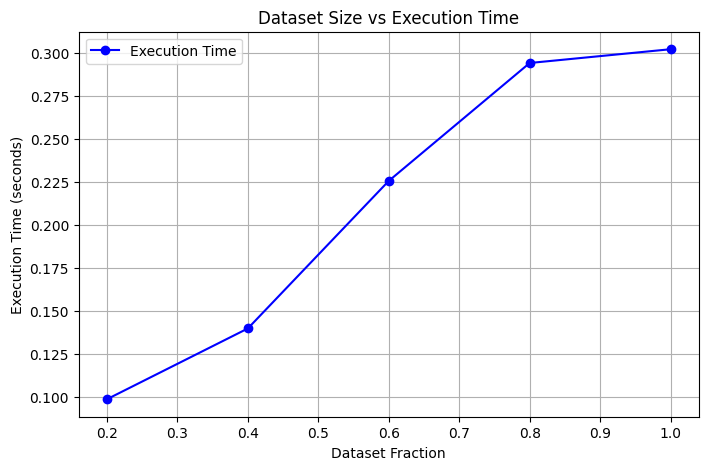

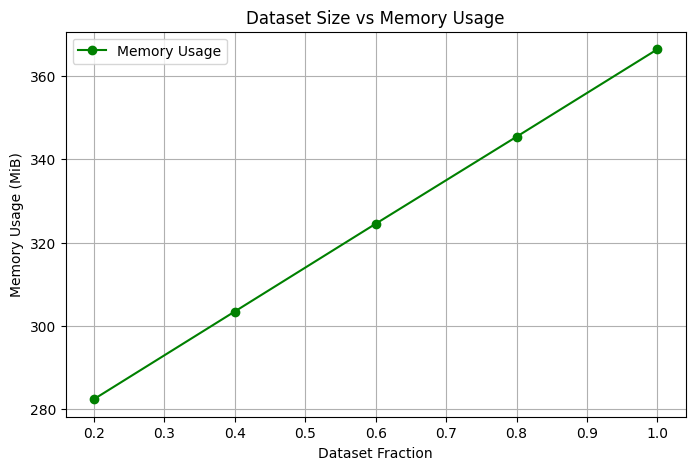

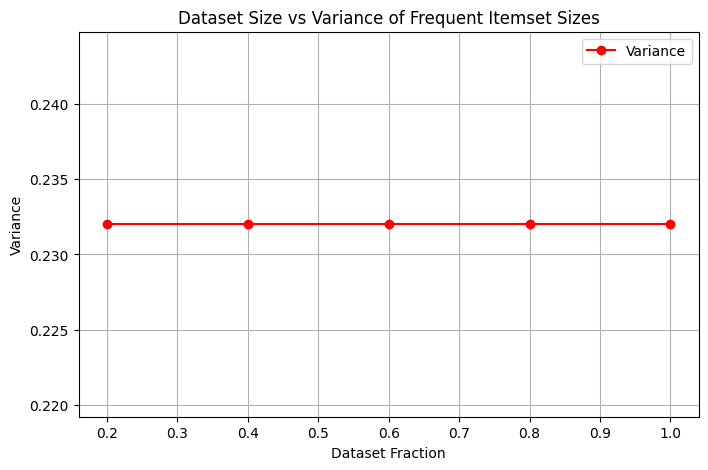

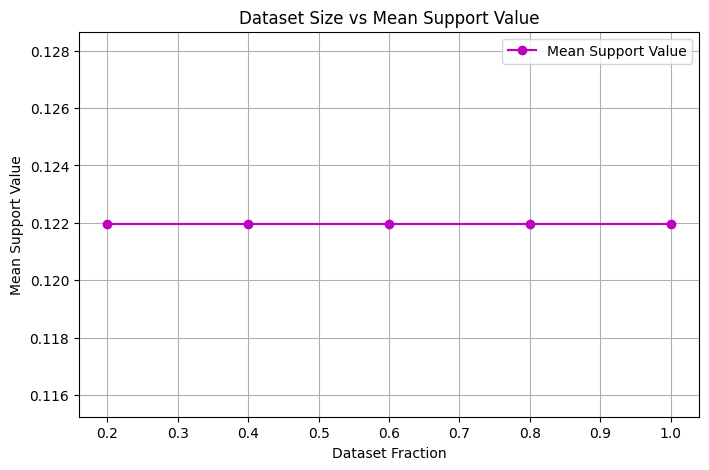

In [11]:
# Plot dataset vs execution time
plt.figure(figsize=(8, 5))
plt.plot(dataset_sizes, execution_times, marker='o', linestyle='-', color='b', label='Execution Time')
plt.title('Dataset Size vs Execution Time')
plt.xlabel('Dataset Fraction')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.legend()
plt.show()

# Plot dataset vs memory usage
plt.figure(figsize=(8, 5))
plt.plot(dataset_sizes, memory_usages, marker='o', linestyle='-', color='g', label='Memory Usage')
plt.title('Dataset Size vs Memory Usage')
plt.xlabel('Dataset Fraction')
plt.ylabel('Memory Usage (MiB)')
plt.grid(True)
plt.legend()
plt.show()

# Plot dataset vs variance
plt.figure(figsize=(8, 5))
plt.plot(dataset_sizes, variances, marker='o', linestyle='-', color='r', label='Variance')
plt.title('Dataset Size vs Variance of Frequent Itemset Sizes')
plt.xlabel('Dataset Fraction')
plt.ylabel('Variance')
plt.grid(True)
plt.legend()
plt.show()

# Plot dataset vs mean support value (MSV)
plt.figure(figsize=(8, 5))
plt.plot(dataset_sizes, mean_support_values, marker='o', linestyle='-', color='m', label='Mean Support Value')
plt.title('Dataset Size vs Mean Support Value')
plt.xlabel('Dataset Fraction')
plt.ylabel('Mean Support Value')
plt.grid(True)
plt.legend()
plt.show()


Dataset Sizes vs Execution Time:
Dataset Size: 50, Execution Time: 0.08 seconds
Dataset Size: 100, Execution Time: 0.05 seconds
Dataset Size: 150, Execution Time: 0.06 seconds
Dataset Size: 200, Execution Time: 0.05 seconds
Dataset Size: 250, Execution Time: 0.06 seconds


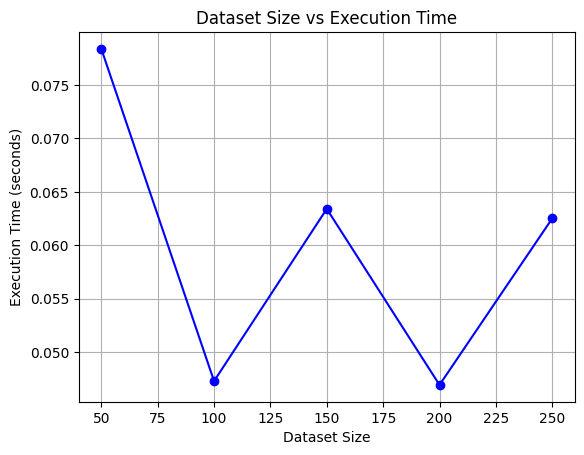

In [12]:
import pandas as pd
import time
from mlxtend.frequent_patterns import apriori
import numpy as np

# Assuming df_encoded is your original dataset

# List of dataset sizes to evaluate
dataset_sizes = [50, 100, 150, 200, 250]  # Modify as needed
execution_times = []

# Loop over different dataset sizes
for size in dataset_sizes:
    # Take a subset of the dataset
    df_subset = df_encoded.head(size)
    
    # Measure the execution time for Apriori algorithm
    start_time = time.time()
    frequent_itemsets = apriori(df_subset, min_support=0.05, use_colnames=True)
    execution_time = time.time() - start_time
    
    # Store the execution time
    execution_times.append(execution_time)

# Print the results
print("Dataset Sizes vs Execution Time:")
for size, exec_time in zip(dataset_sizes, execution_times):
    print(f"Dataset Size: {size}, Execution Time: {exec_time:.2f} seconds")

# Now you can plot the results
import matplotlib.pyplot as plt

plt.plot(dataset_sizes, execution_times, marker='o', linestyle='-', color='b')
plt.title("Dataset Size vs Execution Time")
plt.xlabel("Dataset Size")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.show()


Dataset Sizes vs Memory Usage (in MB):
Dataset Size: 50, Memory Usage: 0.48 MB
Dataset Size: 100, Memory Usage: 0.26 MB
Dataset Size: 150, Memory Usage: 0.00 MB
Dataset Size: 200, Memory Usage: -0.25 MB
Dataset Size: 250, Memory Usage: 0.25 MB


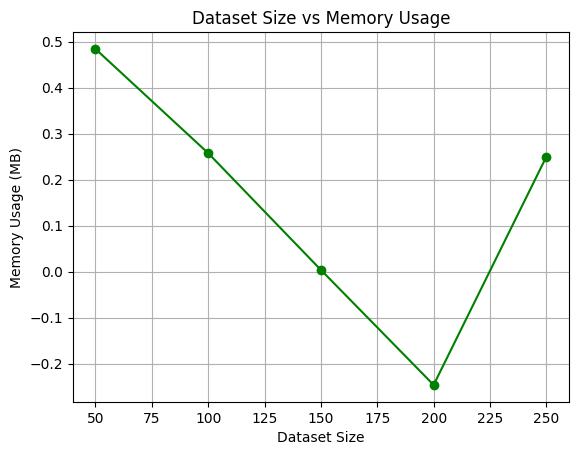

In [13]:
import psutil
import os

# List to store memory usage for each dataset size
memory_usages = []

# Loop over different dataset sizes
for size in dataset_sizes:
    # Take a subset of the dataset
    df_subset = df_encoded.head(size)
    
    # Measure memory usage before running Apriori
    process = psutil.Process(os.getpid())
    memory_before = process.memory_info().rss / 1024 / 1024  # Convert to MB
    
    # Run the Apriori algorithm
    start_time = time.time()
    frequent_itemsets = apriori(df_subset, min_support=0.05, use_colnames=True)
    execution_time = time.time() - start_time
    
    # Measure memory usage after running Apriori
    memory_after = process.memory_info().rss / 1024 / 1024  # Convert to MB
    
    # Store the memory usage (difference between before and after)
    memory_usages.append(memory_after - memory_before)

# Print the results
print("Dataset Sizes vs Memory Usage (in MB):")
for size, mem_usage in zip(dataset_sizes, memory_usages):
    print(f"Dataset Size: {size}, Memory Usage: {mem_usage:.2f} MB")

# Plot the memory usage
plt.plot(dataset_sizes, memory_usages, marker='o', linestyle='-', color='g')
plt.title("Dataset Size vs Memory Usage")
plt.xlabel("Dataset Size")
plt.ylabel("Memory Usage (MB)")
plt.grid(True)
plt.show()


Dataset Sizes vs Number of Frequent Itemsets:
Dataset Size: 50, Number of Frequent Itemsets: 39
Dataset Size: 100, Number of Frequent Itemsets: 41
Dataset Size: 150, Number of Frequent Itemsets: 38
Dataset Size: 200, Number of Frequent Itemsets: 39
Dataset Size: 250, Number of Frequent Itemsets: 40


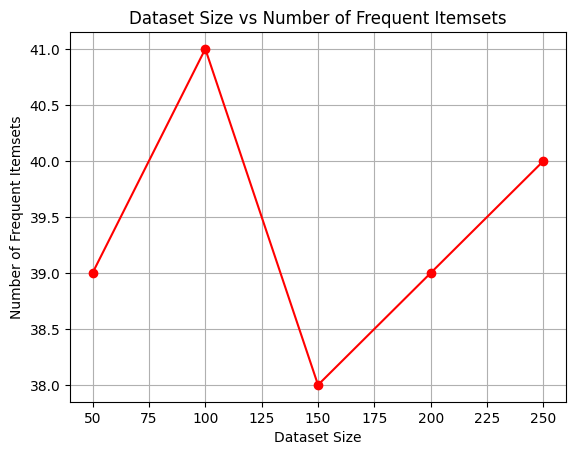

In [14]:
# List to store the number of frequent itemsets for each dataset size
num_itemsets = []

# Loop over different dataset sizes
for size in dataset_sizes:
    # Take a subset of the dataset
    df_subset = df_encoded.head(size)
    
    # Run the Apriori algorithm
    frequent_itemsets = apriori(df_subset, min_support=0.05, use_colnames=True)
    
    # Store the number of frequent itemsets
    num_itemsets.append(len(frequent_itemsets))

# Print the results
print("Dataset Sizes vs Number of Frequent Itemsets:")
for size, num_itemset in zip(dataset_sizes, num_itemsets):
    print(f"Dataset Size: {size}, Number of Frequent Itemsets: {num_itemset}")

# Plot the number of frequent itemsets
plt.plot(dataset_sizes, num_itemsets, marker='o', linestyle='-', color='r')
plt.title("Dataset Size vs Number of Frequent Itemsets")
plt.xlabel("Dataset Size")
plt.ylabel("Number of Frequent Itemsets")
plt.grid(True)
plt.show()


Dataset Sizes vs Average Number of Items in Rules:
Dataset Size: 50, Average Number of Items in Rules: 2.25
Dataset Size: 100, Average Number of Items in Rules: 2.00
Dataset Size: 150, Average Number of Items in Rules: 2.00
Dataset Size: 200, Average Number of Items in Rules: 2.00
Dataset Size: 250, Average Number of Items in Rules: 2.00


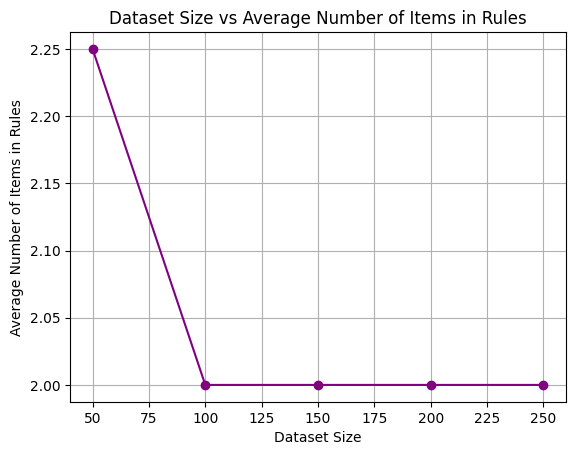

In [15]:
from mlxtend.frequent_patterns import association_rules

# List to store the number of items in association rules for each dataset size
num_items_in_rules = []

# Loop over different dataset sizes
for size in dataset_sizes:
    # Take a subset of the dataset
    df_subset = df_encoded.head(size)
    
    # Run the Apriori algorithm
    frequent_itemsets = apriori(df_subset, min_support=0.05, use_colnames=True)
    
    # Generate association rules from the frequent itemsets
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    
    # Count the number of items in the antecedent and consequent of each rule
    num_items_in_rule = rules['antecedents'].apply(lambda x: len(x)).mean() + rules['consequents'].apply(lambda x: len(x)).mean()
    
    # Store the average number of items in the rules
    num_items_in_rules.append(num_items_in_rule)

# Print the results
print("Dataset Sizes vs Average Number of Items in Rules:")
for size, num_items in zip(dataset_sizes, num_items_in_rules):
    print(f"Dataset Size: {size}, Average Number of Items in Rules: {num_items:.2f}")

# Plot the number of items in the rules
plt.plot(dataset_sizes, num_items_in_rules, marker='o', linestyle='-', color='purple')
plt.title("Dataset Size vs Average Number of Items in Rules")
plt.xlabel("Dataset Size")
plt.ylabel("Average Number of Items in Rules")
plt.grid(True)
plt.show()
